<a href="https://colab.research.google.com/github/TheekshanaR1/TheekshanaR/blob/main/cat_dog_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
!pip install numpy -q
!pip install pandas -q
!pip install matplotlib -q
!pip install tensorflow -q
!pip install opendatasets -q

In [36]:
#import necessary libraries
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import time

import opendatasets as od #for download kaggle dataset

In [37]:
od.download("https://www.kaggle.com/datasets/dineshpiyasamara/cats-and-dogs-for-classification")

Skipping, found downloaded files in "./cats-and-dogs-for-classification" (use force=True to force download)


In [38]:
BATCH_SIZE=32
IMAGE_SIZE= (128,128)

In [39]:
train_data_dir="/content/cats-and-dogs-for-classification/cats_dogs/train"
test_data_dir="/content/cats-and-dogs-for-classification/cats_dogs/test"

In [40]:
train_data=tf.keras.utils.image_dataset_from_directory(train_data_dir,batch_size=BATCH_SIZE,image_size=IMAGE_SIZE,subset='training',validation_split=0.1,seed=42)

validation_data=tf.keras.utils.image_dataset_from_directory(train_data_dir,batch_size=BATCH_SIZE,image_size=IMAGE_SIZE,subset='validation',validation_split=0.1,seed=42)

test_data=tf.keras.utils.image_dataset_from_directory(test_data_dir,batch_size=BATCH_SIZE,image_size=IMAGE_SIZE)

Found 8000 files belonging to 2 classes.
Using 7200 files for training.
Found 8000 files belonging to 2 classes.
Using 800 files for validation.
Found 2000 files belonging to 2 classes.


In [41]:
class_names=train_data.class_names
class_names

['cats', 'dogs']

In [42]:
for image_batch,label_batch in train_data.take(1):
  print(image_batch.shape)
  print(label_batch.shape)

(32, 128, 128, 3)
(32,)


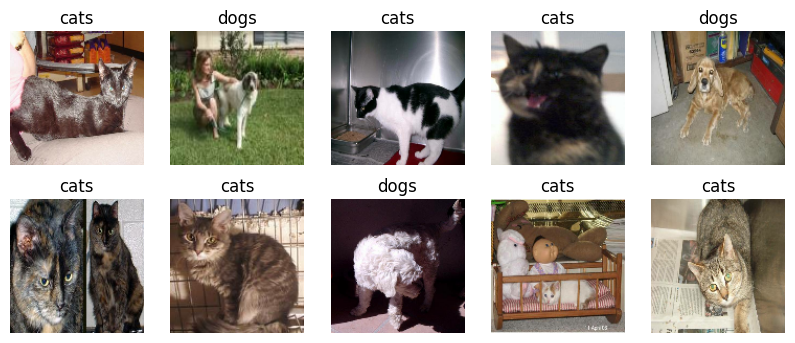

In [43]:
#plot the dat sample
plt.figure(figsize=(10,4))
for image,label in train_data.take(1):
  for i in range(10):
    ax=plt.subplot(2,5,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(class_names[label[i]])
    plt.axis('off')

In [44]:
for image,label in train_data.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[101.00769   104.00769   109.00769  ]
   [111.074585  112.71521   114.30505  ]
   [117.635284  115.31354   112.59396  ]
   ...
   [129.86246   132.91324   136.22964  ]
   [126.8725    133.10297   135.69281  ]
   [128.9002    138.99207   139.94614  ]]

  [[ 85.20029    88.20029    93.20029  ]
   [ 99.3725     99.79227   101.78906  ]
   [114.00287   112.997925  110.048706 ]
   ...
   [116.720825  120.720825  123.720825 ]
   [119.9389    126.16937   128.75922  ]
   [138.79547   147.0824    148.93893  ]]

  [[ 92.54297    94.90234    99.58203  ]
   [ 91.57605    91.986206   93.986206 ]
   [105.38388   104.38388   101.75107  ]
   ...
   [120.73743   125.52237   128.52237  ]
   [130.21445   135.21445   138.21445  ]
   [127.32648   134.36554   136.68585  ]]

  ...

  [[118.07504   122.07504   125.07504  ]
   [121.617584  125.617584  128.61758  ]
   [130.54602   134.54602   137.54602  ]
   ...
   [ 81.51825    87.02301    96.76108  ]
   [ 45.951294   50.819916   54.147003 ]
   [ 

In [45]:
#Normalization(Feature scaling)
train_data=train_data.map(lambda x,y:(x/255,y))
validation_data=validation_data.map(lambda x,y:(x/255,y))
test_data=test_data.map(lambda x,y:(x/255,y))


In [46]:
for image,label in train_data.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[0.15117954 0.08451287 0.12372855]
   [0.1564951  0.08982843 0.12904412]
   [0.14387254 0.07720588 0.11642157]
   ...
   [0.         0.00392157 0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.15078124 0.08411458 0.12333027]
   [0.1463848  0.07971814 0.11893383]
   [0.13852635 0.07185968 0.11107536]
   ...
   [0.         0.         0.        ]
   [0.         0.00127145 0.        ]
   [0.         0.         0.        ]]

  [[0.15681386 0.09014719 0.12936288]
   [0.15010071 0.08343404 0.12264973]
   [0.1491728  0.08250613 0.12172181]
   ...
   [0.00392157 0.         0.        ]
   [0.         0.00392157 0.        ]
   [0.         0.         0.        ]]

  ...

  [[0.7237403  0.6738876  0.726761  ]
   [0.7528033  0.7035823  0.75956535]
   [0.77319306 0.71951526 0.7698836 ]
   ...
   [0.04705882 0.00392157 0.03529412]
   [0.05098039 0.         0.03529412]
   [0.0395804  0.         0.03137255]]

  [[0.7596398  0.66668636 0.694030

In [47]:
data_augmentation=tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal',input_shape=(128,128,3)),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [48]:
model=tf.keras.models.Sequential()

model.add(data_augmentation)

model.add(tf.keras.layers.Conv2D(32,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(64,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(128,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128,activation="relu"))
model.add(tf.keras.layers.Dense(128,activation="relu"))
model.add(tf.keras.layers.Dense(32,activation="relu"))

model.add(tf.keras.layers.Dense(1,activation="sigmoid"))

In [49]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_7 (Sequential)       │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,325,825 (12.69 MB)

 Trainable params: 3,325,569 (12.69 MB)

 Non-trainable params: 256 (1.00 KB)

In [50]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [51]:
from IPython.core import history
start_time=time.time()

history=model.fit(train_data,epochs=20,validation_data=validation_data)

end_time=time.time()

Epoch 1/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.5700 - loss: 0.6888 - val_accuracy: 0.5075 - val_loss: 0.6799
Epoch 2/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.6326 - loss: 0.6386 - val_accuracy: 0.6425 - val_loss: 0.6301
Epoch 3/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.6518 - loss: 0.6225 - val_accuracy: 0.7188 - val_loss: 0.5804
Epoch 4/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.6654 - loss: 0.6003 - val_accuracy: 0.7038 - val_loss: 0.5683
Epoch 5/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - accuracy: 0.6987 - loss: 0.5789 - val_accuracy: 0.7013 - val_loss: 0.6409
Epoch 6/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.7040 - loss: 0.5722 - val_accuracy: 0.7075 - val_loss: 0.5426
Epoch 7/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.7180 - loss: 0.5561 - val_accuracy: 0.6625 - val_loss: 0.6208
Epoch 8/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7270 - loss: 0.5342 - val_

In [52]:
history.history

{'accuracy': [0.5841666460037231,
  0.6369444727897644,
  0.6524999737739563,
  0.6775000095367432,
  0.6965277791023254,
  0.7015277743339539,
  0.7201389074325562,
  0.7276389002799988,
  0.7406944632530212,
  0.75,
  0.754444420337677,
  0.7588889002799988,
  0.7640277743339539,
  0.777222216129303,
  0.7806944251060486,
  0.7770833373069763,
  0.7958333492279053,
  0.7977777719497681,
  0.7963888645172119,
  0.8052777647972107],
 'loss': [0.6716849207878113,
  0.6366187930107117,
  0.6207024455070496,
  0.5922077894210815,
  0.5769330263137817,
  0.568317174911499,
  0.5506575107574463,
  0.5323614478111267,
  0.521477222442627,
  0.5111289620399475,
  0.49835672974586487,
  0.48968952894210815,
  0.4805128872394562,
  0.4728785455226898,
  0.462674617767334,
  0.45444339513778687,
  0.4413016438484192,
  0.4365547001361847,
  0.43433403968811035,
  0.4212229549884796],
 'val_accuracy': [0.5074999928474426,
  0.6424999833106995,
  0.71875,
  0.7037500143051147,
  0.7012500166893005

In [54]:
precision=tf.keras.metrics.Precision()
recall=tf.keras.metrics.Recall()
accuracy=tf.keras.metrics.BinaryAccuracy()


In [56]:
for batch in test_data.as_numpy_iterator():
  X, y= batch
  yhat = model.predict(X)
  precision.update_state(y,yhat)
  recall.update_state(y,yhat)
  accuracy.update_state(y,yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━

In [57]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.7927170991897583>

In [58]:
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.8489999771118164>

In [59]:
accuracy.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.8134999871253967>

In [60]:
!pip install opencv-python

In [61]:
import cv2

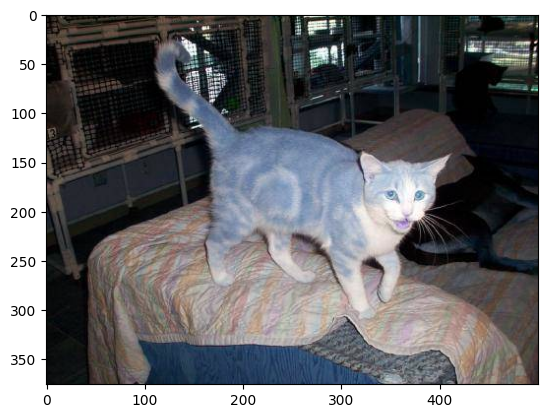

In [62]:
image=cv2.imread("/content/cats-and-dogs-for-classification/cats_dogs/test/cats/cat.4033.jpg")
plt.imshow(image)
plt.show()

In [63]:
resized_image=tf.image.resize(image,IMAGE_SIZE)
scaled_image=resized_image/255


In [64]:
scaled_image

<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.02846009, 0.02453853, 0.01401654],
        [0.07072993, 0.05755591, 0.03794807],
        [0.04237707, 0.02852903, 0.01285424],
        ...,
        [0.19558057, 0.28375843, 0.23862784],
        [0.17841223, 0.25668657, 0.20950522],
        [0.04770412, 0.1257353 , 0.09044117]],

       [[0.11758004, 0.10621745, 0.09053117],
        [0.15350606, 0.13550092, 0.11589307],
        [0.19933939, 0.17496362, 0.1454293 ],
        ...,
        [0.16940103, 0.25231695, 0.25513557],
        [0.18944164, 0.26824066, 0.27105927],
        [0.0710612 , 0.12633081, 0.08429649]],

       [[0.1235543 , 0.10394646, 0.09218176],
        [0.07918773, 0.05565832, 0.03605048],
        [0.08967716, 0.05726295, 0.03124426],
        ...,
        [0.19203623, 0.22287646, 0.20616958],
        [0.23546645, 0.2581859 , 0.2548656 ],
        [0.10888863, 0.13002451, 0.08688726]],

       ...,

       [[0.03918313, 0.04702627, 0.05094784],
        [0.04

In [65]:
np.expand_dims(scaled_image,0).shape

(1, 128, 128, 3)

In [66]:
y_hat=model.predict(np.expand_dims(scaled_image,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


In [67]:
y_hat

array([[0.13982008]], dtype=float32)

In [70]:
if y_hat >= 0.5:
  print(class_names[1])
else:
  print(class_names[0])

cats
